In [1]:
from IPython import display
from matplotlib import pyplot as plt
from mxnet import autograd, nd
import random

%matplotlib inline

In [2]:
nd.random.normal?

In [3]:
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = nd.random.normal(scale=1, shape=(num_examples, num_inputs))
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += nd.random.normal(scale=0.01, shape=labels.shape)

In [4]:
features[0], labels[0]

(
 [ 2.21220636  0.7740038 ]
 <NDArray 2 @cpu(0)>, 
 [ 6.00058699]
 <NDArray 1 @cpu(0)>)

In [5]:
# 矢量图展示数据
def use_svg_display():
    display.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    # 设置图的尺寸
    plt.rcParams['figure.figsize'] = figsize

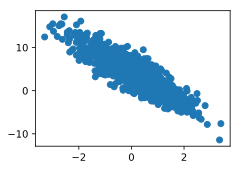

In [6]:
set_figsize()
plt.scatter(features[:, 1].asnumpy(), labels.asnumpy())

In [7]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)  # 样本的读取顺序是随机的
    for i in range(0, num_examples, batch_size):
        j = nd.array(indices[i: min(i + batch_size, num_examples)])
        yield features.take(j), labels.take(j)  # take 函数根据索引返回对应元素

In [8]:
batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X, y)


[[-0.16280021 -0.21246749]
 [ 1.41863704 -1.39986444]
 [ 0.5210222  -0.53505981]
 [ 0.23113538  1.08282423]
 [ 1.6947968  -0.28610373]
 [ 0.1533563  -0.73579401]
 [-2.26854467  0.10456404]
 [ 0.9252283  -1.49028432]
 [-1.40116668 -1.10880303]
 [ 0.29968393  1.07235289]]
<NDArray 10x2 @cpu(0)> 
[  4.5908432   11.80155182   7.05463696   0.95886403   8.55360508
   6.98703671  -0.68796682  11.12431812   5.16207981   1.14821637]
<NDArray 10 @cpu(0)>

[[-0.22558607 -0.20714636]
 [-0.68450481 -0.10388865]
 [-1.23553133  0.89192426]
 [-1.22608781 -1.18390703]
 [ 0.36512318 -0.05032287]
 [-1.23582733 -2.2571876 ]
 [-0.9910388  -0.19236775]
 [-1.2895633  -1.01600873]
 [ 0.65464926 -1.15258658]
 [-0.55260897 -0.53883553]]
<NDArray 10x2 @cpu(0)> 
[ 4.44664669  3.18180585 -1.30710232  5.77291393  5.09120703  9.42146873
  2.87050509  5.07093716  9.42298222  4.91452932]
<NDArray 10 @cpu(0)>

[[ 0.53139567 -2.03484344]
 [-1.97720897 -0.99989241]
 [ 0.50342274  1.90229154]
 [ 0.27739874 -1.11595118]
 

In [9]:
# 初始化模型参数
w = nd.random.normal(scale=0.01, shape=(num_inputs, 1))
b = nd.zeros(shape=(1,))

In [10]:
w.attach_grad()
b.attach_grad()

In [11]:
# 定义模型
def linreg(X, w, b):
    return nd.dot(X, w) + b

In [12]:
# 定义损失函数
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [13]:
# 定义优化算法
def sgd(params, lr, batch_size):
    for param in params:
        param[:] = param - lr * param.grad / batch_size

In [14]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        with autograd.record():
            l = loss(net(X, w, b), y)
        l.backward()
        sgd([w, b], lr, batch_size)
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().asnumpy()))

epoch 1, loss 0.040548
epoch 2, loss 0.000155
epoch 3, loss 0.000050


In [15]:
true_w, true_b

([2, -3.4], 4.2)

In [16]:
w, b

(
 [[ 2.00014186]
  [-3.39992428]]
 <NDArray 2x1 @cpu(0)>, 
 [ 4.19964075]
 <NDArray 1 @cpu(0)>)